## (b)

In [5]:
import math
import statistics
import matplotlib.pyplot as plt
from random import seed
import numpy as np
from scipy.stats import norm

In [6]:
S0 = 100  # Initial stock price
r = 0.02  # Risk-free rate
sigma = 0.2  # Volatility
T = 1  # Time to maturity
X = 5  # Strike price increment

L = S0 - X  # Low strike price
M = S0  # Middle strike price
K = S0 + X  # High strike price

# Black-Scholes formula for a call option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Compute option prices
call_L = black_scholes_call(S0, L, T, r, sigma)
call_M = black_scholes_call(S0, M, T, r, sigma)
call_K = black_scholes_call(S0, K, T, r, sigma)

# Butterfly spread price
butterfly_price = call_L - 2 * call_M + call_K

# Print results
print(f"Call option price with strike L ({L}): {call_L:.2f}")
print(f"Call option price with strike M ({M}): {call_M:.2f}")
print(f"Call option price with strike K ({K}): {call_K:.2f}")
print(f"Butterfly spread price: {butterfly_price:.2f}")

Call option price with strike L (95): 11.61
Call option price with strike M (100): 8.92
Call option price with strike K (105): 6.70
Butterfly spread price: 0.49


## (c)

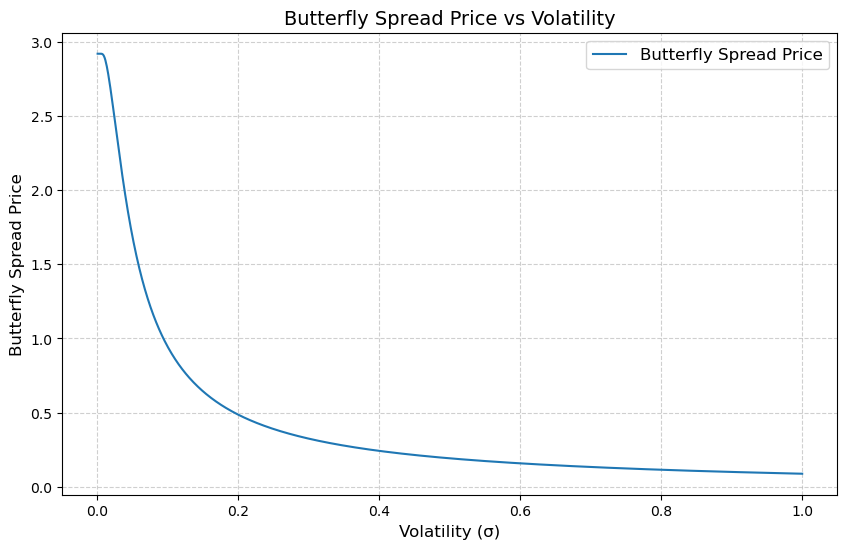

In [9]:
volatilities = np.arange(0.001, 1.001, 0.001)  # From 0.001 to 1 in steps of 0.001
butterfly_prices = []

# Calculate butterfly spread price for each volatility
for sigma in volatilities:
    call_L = black_scholes_call(S0, L, T, r, sigma)
    call_M = black_scholes_call(S0, M, T, r, sigma)
    call_K = black_scholes_call(S0, K, T, r, sigma)
    butterfly_price = call_L - 2 * call_M + call_K
    butterfly_prices.append(butterfly_price)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(volatilities, butterfly_prices, label='Butterfly Spread Price')
plt.title('Butterfly Spread Price vs Volatility', fontsize=14)
plt.xlabel('Volatility (\u03c3)', fontsize=12)
plt.ylabel('Butterfly Spread Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

## (d)

Butterfly Spread Initial Value: 0.4865
VaR (95% Confidence): 0.1904
Expected Shortfall (ES): 0.2564


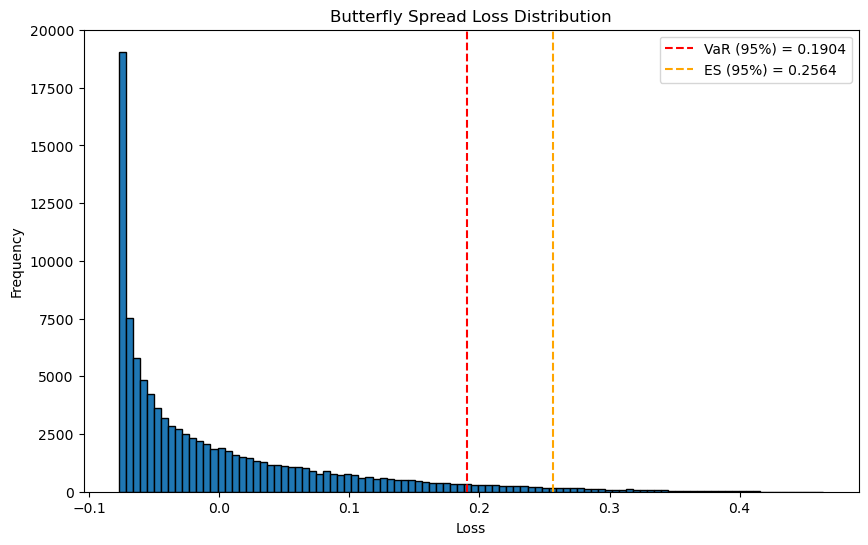

In [5]:
# Parameters
mu = 0.06     # Expected return
H = 0.25      # Risk horizon (3 months)
T_bar = T - H # Remaining time to maturity
n = 100000    # Number of simulations
confidence = 0.95  # Confidence level

# Initial butterfly spread value
v0 = black_scholes_call(S0, L, T, r, sigma) - 2 * black_scholes_call(S0, M, T, r, sigma) + black_scholes_call(S0, K, T, r, sigma)

# Seed random number generator
seed(1)
# Simulate stock prices
Zt = np.random.normal(0, 1, n)
St = S0 * np.exp((mu - 0.5 * sigma**2) * H) * np.exp(Zt * sigma * np.sqrt(H))

# Calculate butterfly spread values at time h
vt = np.zeros(n)
for i in range(n):
    vt[i] = (black_scholes_call(St[i], L, T_bar, r, sigma) - 
             2 * black_scholes_call(St[i], M, T_bar, r, sigma) + 
             black_scholes_call(St[i], K, T_bar, r, sigma))

# Loss calculation vvar = loss
vvar = v0 - vt
vvar = np.sort(vvar)

# Calculate VaR
ivar = round(confidence * n) 
var = vvar[ivar]

# Calculate Expected Shortfall (ES)
es = statistics.mean(vvar[range(math.floor((confidence) * n),n)])

print(f"Butterfly Spread Initial Value: {v0:.4f}")
print(f"VaR (95% Confidence): {var:.4f}")
print(f"Expected Shortfall (ES): {es:.4f}")

# Histogram of losses
plt.figure(figsize=(10, 6))
plt.hist(vvar, bins=100, edgecolor='black')
plt.title('Butterfly Spread Loss Distribution')
plt.axvline(var, color = 'red', linestyle="--", label=f"VaR (95%) = {var:.4f}")
plt.axvline(es, color="orange", linestyle="--", label=f"ES (95%) = {es:.4f}")
plt.legend(fontsize=10)
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()

Butterfly Spread Initial Value: 0.4865
VaR (95% Confidence): 0.1899
Expected Shortfall (ES): 0.2552


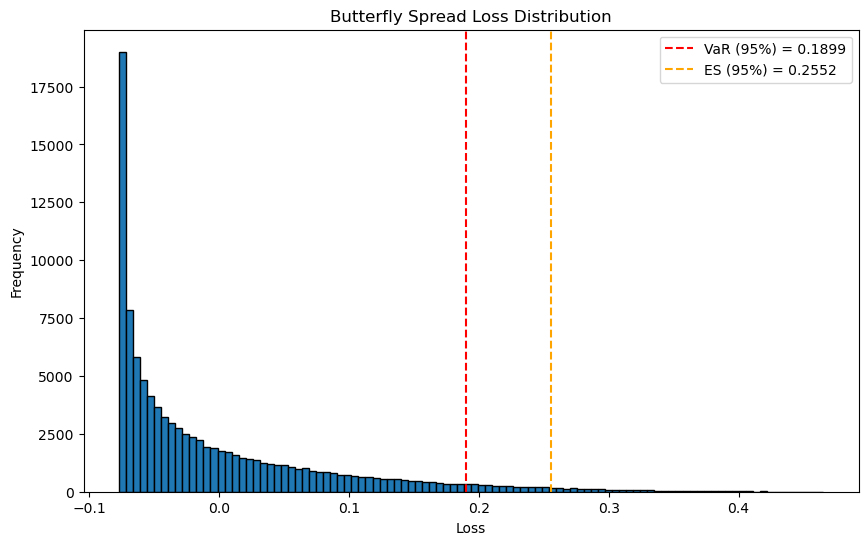

In [7]:
# Parameters
mu = 0.06     # Expected return
H = 0.25      # Risk horizon (3 months)
T_bar = T - H # Remaining time to maturity
n = 100000    # Number of simulations
confidence = 0.95  # Confidence level

# Initial butterfly spread value
v0 = black_scholes_call(S0, L, T, r, sigma) - 2 * black_scholes_call(S0, M, T, r, sigma) + black_scholes_call(S0, K, T, r, sigma)

# Seed random number generator
seed(1)
# Simulate stock prices
Zt = np.random.normal(0, 1, n)
St = S0 * np.exp((mu - 0.5 * sigma**2) * H) * np.exp(Zt * sigma * np.sqrt(H))

# Calculate butterfly spread values at time h
vt = (black_scholes_call(St, L, T_bar, r, sigma) - 
        2 * black_scholes_call(St, M, T_bar, r, sigma) + 
        black_scholes_call(St, K, T_bar, r, sigma))

# Loss calculation vvar = loss
vvar = v0 - vt
vvar = np.sort(vvar)

# Calculate VaR
ivar = round(confidence * n) 
var = vvar[ivar]

# Calculate Expected Shortfall (ES)
es = statistics.mean(vvar[range(math.floor((confidence) * n),n)])

print(f"Butterfly Spread Initial Value: {v0:.4f}")
print(f"VaR (95% Confidence): {var:.4f}")
print(f"Expected Shortfall (ES): {es:.4f}")

# Histogram of losses
plt.figure(figsize=(10, 6))
plt.hist(vvar, bins=100, edgecolor='black')
plt.title('Butterfly Spread Loss Distribution')
plt.axvline(var, color = 'red', linestyle="--", label=f"VaR (95%) = {var:.4f}")
plt.axvline(es, color="orange", linestyle="--", label=f"ES (95%) = {es:.4f}")
plt.legend(fontsize=10)
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()

## (e)

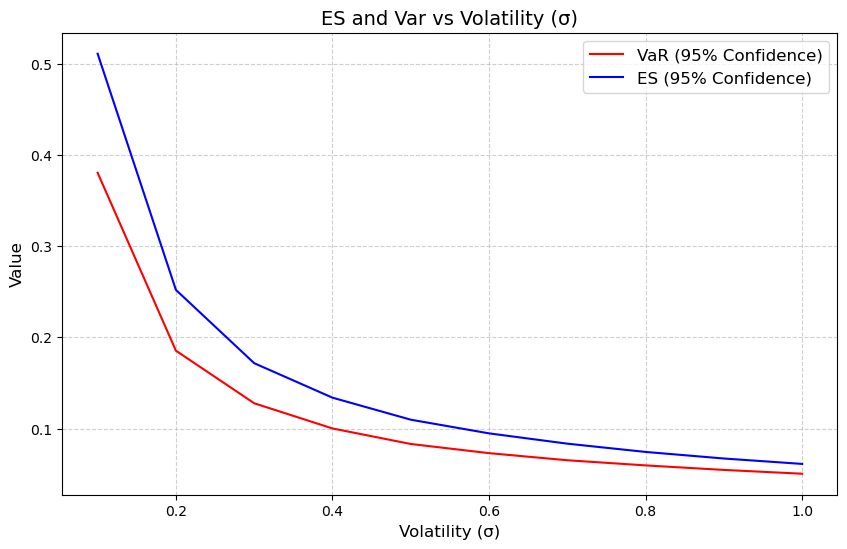

In [9]:
# Volatility range
volatilities = np.arange(0.1, 1.1, 0.1)

# Storage for VaR and ES
VaRs = []
ESs = []

# Loop through volatilities
for sigma in volatilities:
    # Initial butterfly spread value
    v0 = black_scholes_call(S0, L, T, r, sigma) - 2 * black_scholes_call(S0, M, T, r, sigma) + black_scholes_call(S0, K, T, r, sigma)
    
    # Simulate stock prices
    Zt = np.random.normal(0, 1, n)
    St = S0 * np.exp((r - 0.5 * sigma**2) * H + Zt * sigma * np.sqrt(H))
    
    # Butterfly spread values at horizon H
    vt = (black_scholes_call(St, L, T - H, r, sigma) -
          2 * black_scholes_call(St, M, T - H, r, sigma) +
          black_scholes_call(St, K, T - H, r, sigma))
    
    # Losses
    v_loss = v0 - vt
    v_loss_sorted = np.sort(v_loss)
    
    # VaR calculation
    ivar = round(confidence * n)
    var = v_loss_sorted[ivar]
    
    # ES calculation
    es = statistics.mean(v_loss_sorted[range(math.floor((confidence) * n),n)])
    
    # Store results
    VaRs.append(var)
    ESs.append(es)

# Plot VaR vs Volatility
plt.figure(figsize=(10, 6))
plt.plot(volatilities, VaRs, label="VaR (95% Confidence)", color='red')
plt.title('VaR vs Volatility (\u03c3)', fontsize=14)
plt.xlabel('Volatility (\u03c3)', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.plot(volatilities, ESs, label="ES (95% Confidence)", color='blue')
plt.title('ES and Var vs Volatility (\u03c3)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

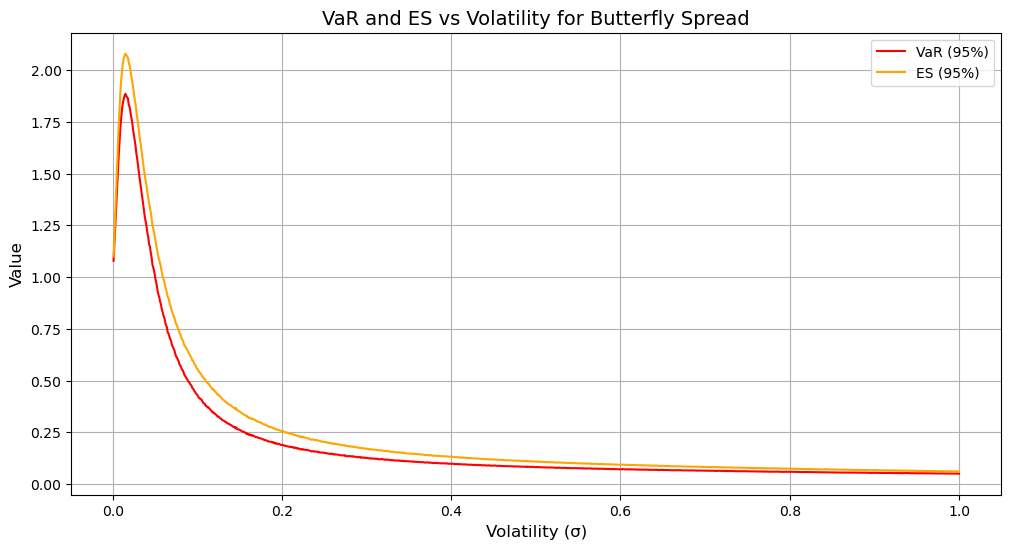

In [17]:
volatility_range = np.arange(0.001, 1.001, 0.001)

# Calculate initial butterfly spread value
v0 = (
    black_scholes_call(S0, L, T, r, volatility_range[:, None])
    - 2 * black_scholes_call(S0, M, T, r, volatility_range[:, None])
    + black_scholes_call(S0, K, T, r, volatility_range[:, None])
)

# Generate random normal samples for all volatilities
Zt = np.random.normal(0, 1, (len(volatility_range), n))

# Simulate stock prices for all volatilities
St_all = S0 * np.exp((mu - 0.5 * volatility_range[:, None]**2) * H + Zt * volatility_range[:, None] * np.sqrt(H))

# Calculate butterfly spread payoffs for all volatilities
C_L = black_scholes_call(St_all, L, T_bar, r, volatility_range[:, None])
C_M = black_scholes_call(St_all, M, T_bar, r, volatility_range[:, None])
C_K = black_scholes_call(St_all, K, T_bar, r, volatility_range[:, None])
vt_all = C_L - 2 * C_M + C_K

# Loss calculation


# Loss for all volatilities
vvar_all = v0 - vt_all

# Sort losses
vvar_sorted = np.sort(vvar_all, axis=1)

# Calculate VaR and ES
ivar = round((confidence)  * n) 
VaR_all = vvar_sorted[:, ivar]
ES_all = np.mean(vvar_sorted[:, ivar:], axis=1)

# Plot VaR and ES against volatility
plt.figure(figsize=(12, 6))

# Plot VaR
plt.plot(volatility_range, VaR_all, label="VaR (95%)", color="red", linewidth=1.5)

# Plot ES
plt.plot(volatility_range, ES_all, label="ES (95%)", color="orange", linewidth=1.5)

# Add titles and labels
plt.title("VaR and ES vs Volatility for Butterfly Spread", fontsize=14)
plt.xlabel("Volatility (σ)", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()